# Datentransformation Bureau

Ziel dieser Datenaufbereitung ist es alle Variablen so zu transformieren, dass sie leicht analysierbar und interpretierbar sind.

In [2]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [3]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [4]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
des = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [5]:
todo = list(bureau.columns)

#### Keine Datenaufbereitung für Primär- und Fremdschlüssel

In [6]:
keys = ["SK_ID_CURR", "SK_ID_BUREAU"]

In [8]:
todo = [element for element in todo if element not in keys]

#### Datenaufbereitung metrische Daten

In [9]:
m_heads = [element for element in todo if bureau[element].dtype.name != "object"]

In [ ]:
bureau.loc[bureau["CREDIT_DAY_OVERDUE"] == 0] = np.nan # Kein Informationsgehalt in Kreditnehmern die 0 Tage überzogen haben
bureau.loc[bureau["AMT_CREDIT_MAX_OVERDUE"] == 0] = np.nan # Kein Informationsgehalt in Kreditnehmern die 0 € überzogen haben

##### Gruppierung

In [10]:
quants = [0, 0.25, 0.5, 0.75, 1]

In [12]:
for index, head in enumerate(m_heads):
    
    df = bureau[["SK_ID_CURR", head]]
    df = df.groupby(by = ["SK_ID_CURR"]).quantile(quants)
    df = df.unstack(level=-1)
    
    try:
        mets = mets.join(df , on = "SK_ID_CURR")
    except (ValueError, NameError):
        mets = df

In [13]:
# Löschen der metrischen Daten aus der TODO Liste
todo = [element for element in todo if element not in m_heads]

In [14]:
mets.head()

DAYS_CREDIT                                CREDIT_DAY_OVERDUE       \
                  0.00    0.25    0.50    0.75   1.00               0.00 0.25   
SK_ID_CURR                                                                      
100001         -1572.0  -894.0  -857.0 -439.50  -49.0                0.0  0.0   
100002         -1437.0 -1122.0 -1042.5 -602.75 -103.0                0.0  0.0   
100003         -2586.0 -1873.5 -1205.5 -732.75 -606.0                0.0  0.0   
100004         -1326.0 -1096.5  -867.0 -637.50 -408.0                0.0  0.0   
100005          -373.0  -255.0  -137.0  -99.50  -62.0                0.0  0.0   

                          DAYS_CREDIT_ENDDATE                                  \
           0.50 0.75 1.00                0.00     0.25   0.50    0.75    1.00   
SK_ID_CURR                                                                      
100001      0.0  0.0  0.0             -1329.0  -503.00 -179.0  656.50  1778.0   
100002      0.0  0.0  0.0             -1072.0 -1006.25 -424.5   79.25   780.0   
100003      0.0  0.0  0.0             -2434.0 -1013.50 -480.0  -11.00  1216.0   
100004      0.0  0.0  0.0              -595.0  -541.75 -488.5 -435.25  -382.0   
100005      0.0  0.0  0.0              -128.0    -3.00  122.0  723.00  1324.0   

           DAYS_ENDDATE_FACT                                 \
                        0.00     0.25   0.50    0.75   1.00   
SK_ID_CURR                                                    
100001               -1328.0  -989.75 -715.0 -550.75 -544.0   
100002               -1185.0 -1020.25 -939.0 -263.75  -36.0   
100003               -2131.0 -1376.00 -621.0 -580.50 -540.0   
100004                -683.0  -607.75 -532.5 -457.25 -382.0   
100005                -123.0  -123.00 -123.0 -123.00 -123.0   

           AMT_CREDIT_MAX_OVERDUE                               \
                             0.00 0.25  0.50    0.75      1.00   
SK_ID_CURR                                                       
100001                        NaN  NaN   NaN     NaN       NaN   
100002                        0.0  0.0  40.5  3321.0  5043.645   
100003                        0.0  0.0   0.0     0.0     0.000   
100004                        0.0  0.0   0.0     0.0     0.000   
100005                        0.0  0.0   0.0     0.0     0.000   

           CNT_CREDIT_PROLONG                     AMT_CREDIT_SUM  \
                         0.00 0.25 0.50 0.75 1.00           0.00   
SK_ID_CURR                                                         
100001                    0.0  0.0  0.0  0.0  0.0        85500.0   
100002                    0.0  0.0  0.0  0.0  0.0            0.0   
100003                    0.0  0.0  0.0  0.0  0.0        22248.0   
100004                    0.0  0.0  0.0  0.0  0.0        94500.0   
100005                    0.0  0.0  0.0  0.0  0.0        29826.0   

                                                         AMT_CREDIT_SUM_DEBT  \
                    0.25       0.50       0.75      1.00                0.00   
SK_ID_CURR                                                                     
100001      102060.00000  168345.00  308700.00  378000.0                 0.0   
100002       28759.17375   54130.50  124301.25  450000.0                 0.0   
100003       60051.37500   92576.25  286875.00  810000.0                 0.0   
100004       94509.45000   94518.90   94528.35   94537.8                 0.0   
100005       44163.00000   58500.00  313650.00  568800.0                 0.0   

                                                   AMT_CREDIT_SUM_LIMIT       \
                0.25     0.50       0.75      1.00                 0.00 0.25   
SK_ID_CURR                                                                     
100001          0.00      0.0  111723.75  373239.0                  0.0  0.0   
100002          0.00      0.0       0.00  245781.0                  0.0  0.0   
100003          0.00      0.0       0.00       0.0                  0.0  0.0   
100004       

#### Datenaufbereitung kategorische Daten

In [16]:
cat_heads = [element for element in todo if bureau[element].dtype.name == "object"]

In [17]:
for index, head in enumerate(cat_heads):
    
    df = bureau[["SK_ID_CURR", head]]
    df = df.groupby(["SK_ID_CURR", head]).size()
    df = df.unstack()
    
    try:
        cats = cats.join(a , on="SK_ID_CURR")
    except (ValueError, NameError):
        cats = df

In [224]:
cats.head()

CREDIT_TYPE,Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Interbank credit,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,
100001,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Zusammenführung metrischer und kategorischer Daten

In [225]:
bureau = mets.join(cats, on = "SK_ID_CURR")

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [226]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
# TODO: BETRACHTUNG IDs DIE NICHT IN APP_TRAIN HINTERLEGT SIND
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
bureau["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

# Unterteilung des Datensatzen nach Payback und Default
payback = bureau[bureau["TARGET"] == "Payback"]
default = bureau[bureau["TARGET"] == "Default"]

In [227]:
bureau.head()

,SK_ID_CURR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)",Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Interbank credit,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan,TARGET
0,100002,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Default
1,100003,-2586.0,-1873.5,-1205.5,-732.75,-606.0,0.0,0.0,0.0,0.0,0.0,-2434.0,-1013.50,-480.0,-11.00,1216.0,-2131.0,-1376.00,-621.0,-580.50,-540.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,22248.0,60051.37500,92576.25,286875.00,810000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202500.00000,810000.000,0.0,0.0,0.0,0.0,0.0,-2131.0,-945.25,-545.0,-415.75,-43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Payback
2,100004,-1326.0,-1096.5,-867.0,-637.50,-408.0,0.0,0.0,0.0,0.0,0.0,-595.0,-541.75,-488.5,-435.25,-382.0,-683.0,-607.75,-532.5,-457.25,-382.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,94500.0,94509.45000,94518.90,94528.35,94537.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-682.0,-607.00,-532.0,-457.00,-382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Payback
3,100007,-1149.0,-1149.0,-1149.0,-1149.00,-1149.0,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,-783.0,-783.00,-783.0,-783.00,-783.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,146250.0,146250.00000,146250.00,146250.00,146250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Payback
4,100008,-1097.0,-1097.0,-1097.0,-587.50,-78.0,0.0,0.0,0.0,0.0,0.0,-853.0,-822.50,-792.0,-160.50,471.0,-1028.0,-968.50,-909.0,-849.50,-790.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,95134.5,100419.75000,105705.00,186655.50,267606.0,0.0,0.0,0.0,120028.5,240057.0,0

Korrektur met_heads

In [228]:
temp = []
for head in list(bureau.columns):
    for m in met_heads:
        if m in head:
            temp.append(head)
met_heads = temp
met_heads

[('DAYS_CREDIT', 0.0),
 ('DAYS_CREDIT', 0.25),
 ('DAYS_CREDIT', 0.5),
 ('DAYS_CREDIT', 0.75),
 ('DAYS_CREDIT', 1.0),
 ('CREDIT_DAY_OVERDUE', 0.0),
 ('CREDIT_DAY_OVERDUE', 0.25),
 ('CREDIT_DAY_OVERDUE', 0.5),
 ('CREDIT_DAY_OVERDUE', 0.75),
 ('CREDIT_DAY_OVERDUE', 1.0),
 ('DAYS_CREDIT_ENDDATE', 0.0),
 ('DAYS_CREDIT_ENDDATE', 0.25),
 ('DAYS_CREDIT_ENDDATE', 0.5),
 ('DAYS_CREDIT_ENDDATE', 0.75),
 ('DAYS_CREDIT_ENDDATE', 1.0),
 ('DAYS_ENDDATE_FACT', 0.0),
 ('DAYS_ENDDATE_FACT', 0.25),
 ('DAYS_ENDDATE_FACT', 0.5),
 ('DAYS_ENDDATE_FACT', 0.75),
 ('DAYS_ENDDATE_FACT', 1.0),
 ('AMT_CREDIT_MAX_OVERDUE', 0.0),
 ('AMT_CREDIT_MAX_OVERDUE', 0.25),
 ('AMT_CREDIT_MAX_OVERDUE', 0.5),
 ('AMT_CREDIT_MAX_OVERDUE', 0.75),
 ('AMT_CREDIT_MAX_OVERDUE', 1.0),
 ('CNT_CREDIT_PROLONG', 0.0),
 ('CNT_CREDIT_PROLONG', 0.25),
 ('CNT_CREDIT_PROLONG', 0.5),
 ('CNT_CREDIT_PROLONG', 0.75),
 ('CNT_CREDIT_PROLONG', 1.0),
 ('AMT_CREDIT_SUM', 0.0),
 ('AMT_CREDIT_SUM', 0.25),
 ('AMT_CREDIT_SUM', 0.5),
 ('AMT_CREDIT_SUM', 0.75

#### Betrachtung & Löschung unrelevanter Daten

In [232]:
a = np.array([1,2,3])
b = np.array([2,4,6])
np.subtract(a,b)

array([-1, -2, -3])

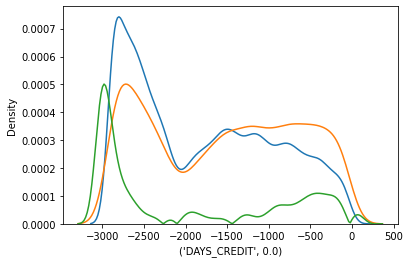

('DAYS_CREDIT', 0.0)           23.081554232294337


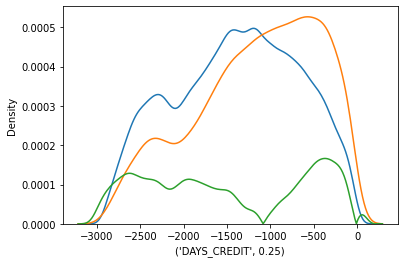

('DAYS_CREDIT', 0.25)          24.294580431122732


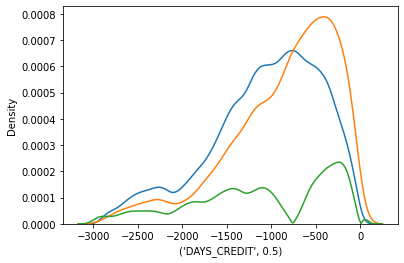

('DAYS_CREDIT', 0.5)           24.10343271257234


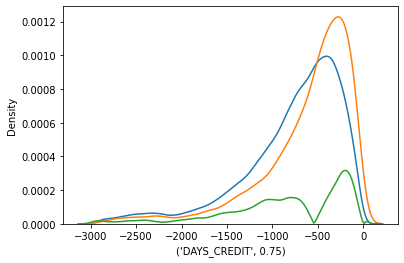

('DAYS_CREDIT', 0.75)          21.350287928399496


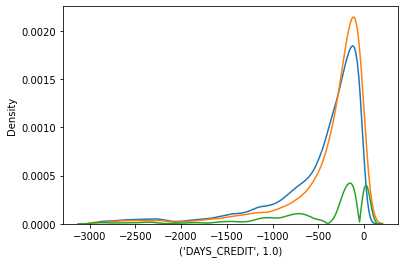

('DAYS_CREDIT', 1.0)           17.891918760656566


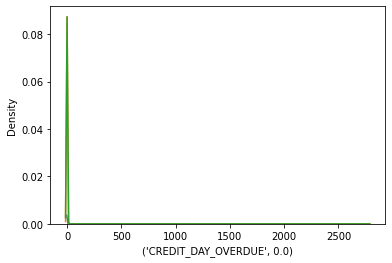

('CREDIT_DAY_OVERDUE', 0.0)    99.4282249229917


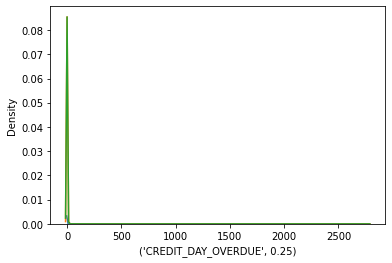

('CREDIT_DAY_OVERDUE', 0.25)   99.38735596830337


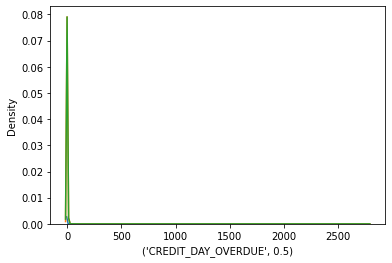

('CREDIT_DAY_OVERDUE', 0.5)    99.36538223651861


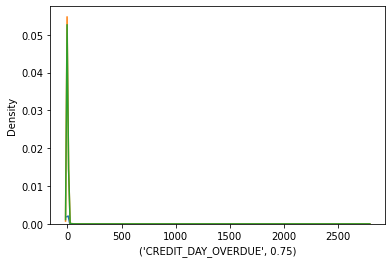

('CREDIT_DAY_OVERDUE', 0.75)   96.35462510791834


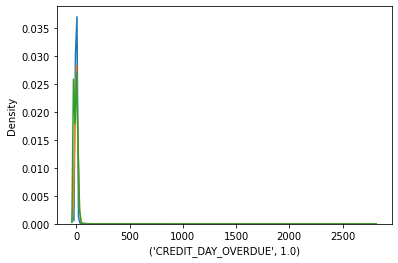

('CREDIT_DAY_OVERDUE', 1.0)    77.80196406564166


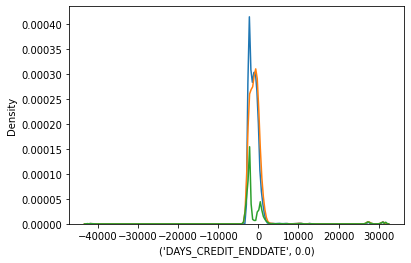

('DAYS_CREDIT_ENDDATE', 0.0)   19.48088799852513


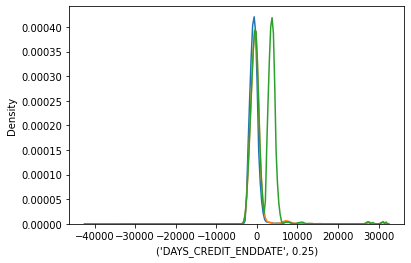

('DAYS_CREDIT_ENDDATE', 0.25)  98.62807017133005


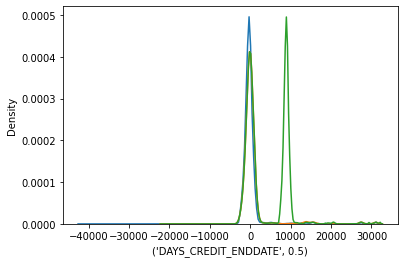

('DAYS_CREDIT_ENDDATE', 0.5)   99.40168723256929


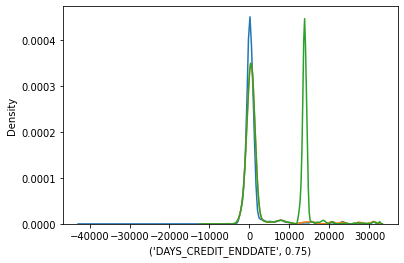

('DAYS_CREDIT_ENDDATE', 0.75)  97.90476732699656


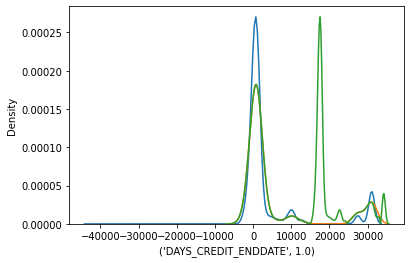

('DAYS_CREDIT_ENDDATE', 1.0)   98.61037830091647


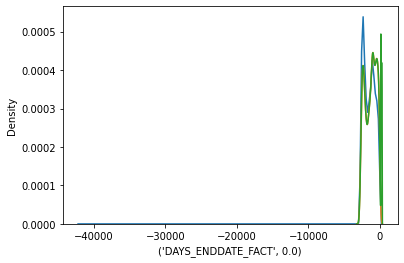

('DAYS_ENDDATE_FACT', 0.0)     99.50684930456607


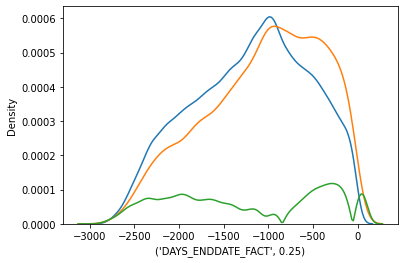

('DAYS_ENDDATE_FACT', 0.25)    16.43977803741111


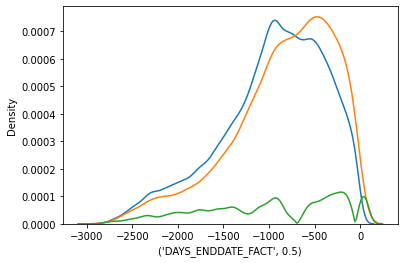

('DAYS_ENDDATE_FACT', 0.5)     13.66344703640959


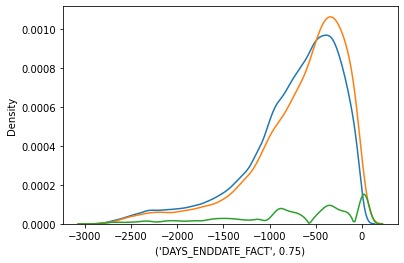

('DAYS_ENDDATE_FACT', 0.75)    9.5903335809248


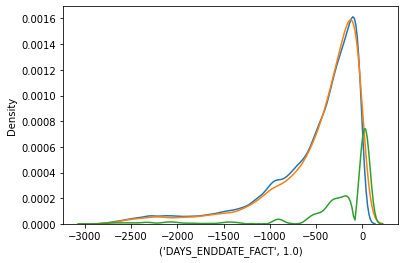

('DAYS_ENDDATE_FACT', 1.0)     16.885375399717013


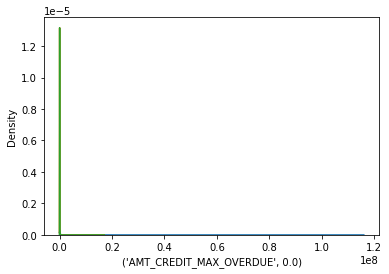

('AMT_CREDIT_MAX_OVERDUE', 0.0) 99.48264635294916


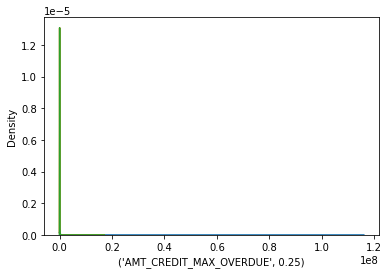

('AMT_CREDIT_MAX_OVERDUE', 0.25) 99.49790353955012


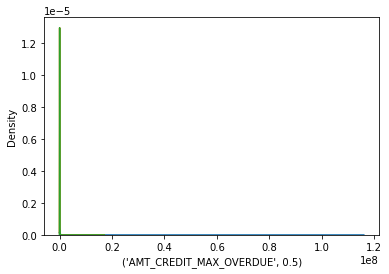

('AMT_CREDIT_MAX_OVERDUE', 0.5) 99.51089649403478


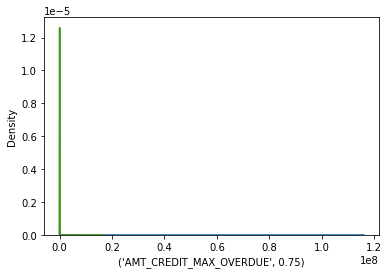

('AMT_CREDIT_MAX_OVERDUE', 0.75) 99.53748836440175


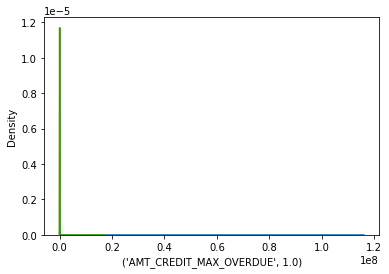

('AMT_CREDIT_MAX_OVERDUE', 1.0) 99.56956782624977


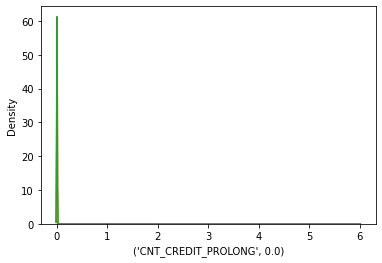

('CNT_CREDIT_PROLONG', 0.0)    99.63826344195175


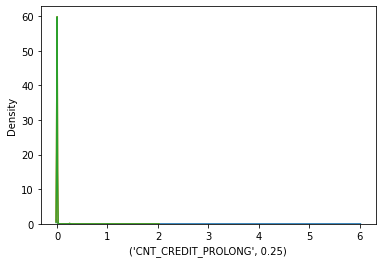

('CNT_CREDIT_PROLONG', 0.25)   99.64700062668338


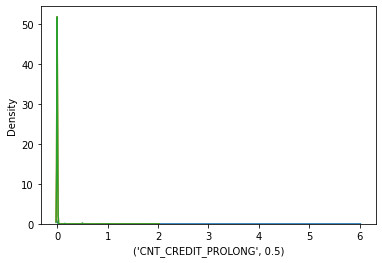

('CNT_CREDIT_PROLONG', 0.5)    99.54993058220093


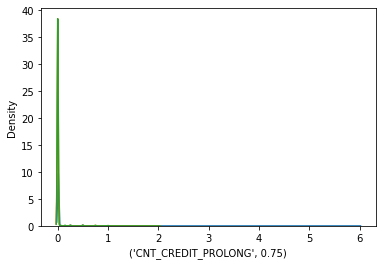

('CNT_CREDIT_PROLONG', 0.75)   94.51414250531207


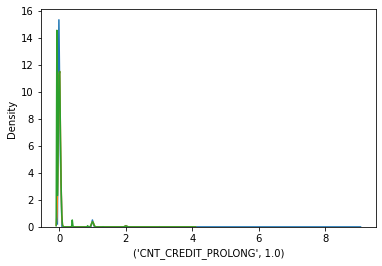

('CNT_CREDIT_PROLONG', 1.0)    94.2050451018913


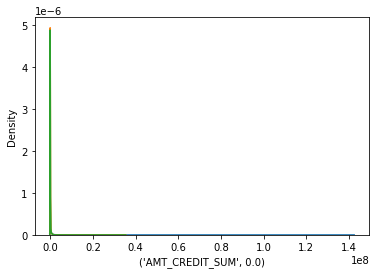

('AMT_CREDIT_SUM', 0.0)        98.50095513957928


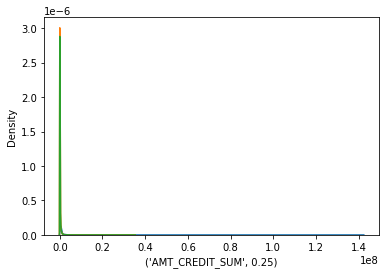

('AMT_CREDIT_SUM', 0.25)       96.96414990221592


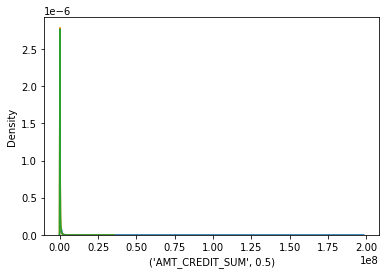

('AMT_CREDIT_SUM', 0.5)        97.60193052012812


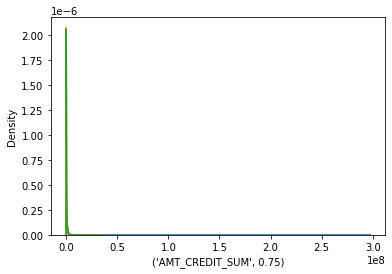

('AMT_CREDIT_SUM', 0.75)       97.9279935921724


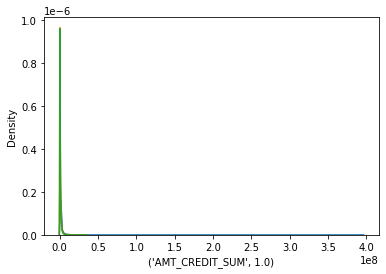

('AMT_CREDIT_SUM', 1.0)        98.73826357062305


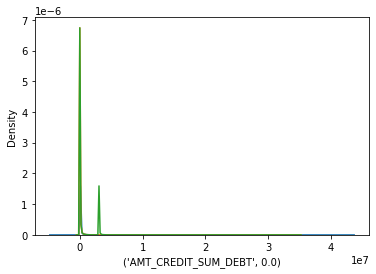

('AMT_CREDIT_SUM_DEBT', 0.0)   99.8966552702997


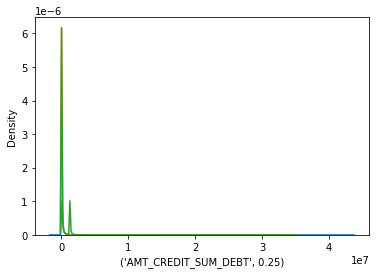

('AMT_CREDIT_SUM_DEBT', 0.25)  99.38417764432222


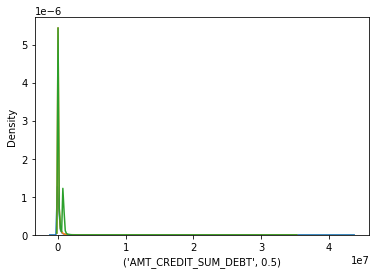

('AMT_CREDIT_SUM_DEBT', 0.5)   98.34072553483804


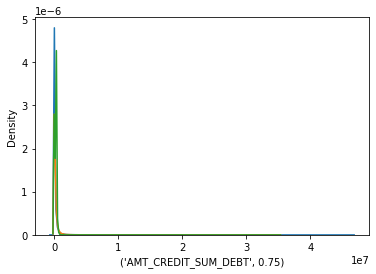

('AMT_CREDIT_SUM_DEBT', 0.75)  89.63172010158038


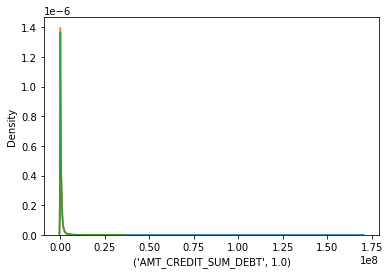

('AMT_CREDIT_SUM_DEBT', 1.0)   94.16062194489929


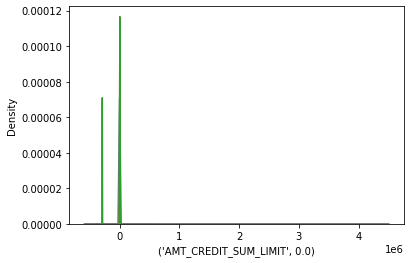

('AMT_CREDIT_SUM_LIMIT', 0.0)  99.99583579979307


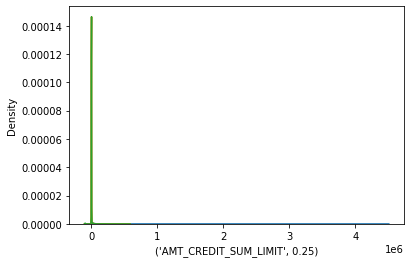

('AMT_CREDIT_SUM_LIMIT', 0.25) 99.99283023724215


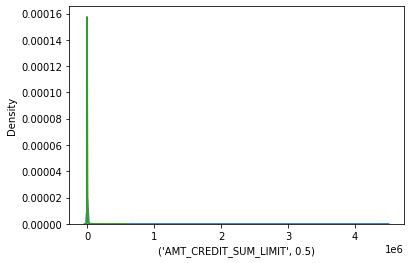

('AMT_CREDIT_SUM_LIMIT', 0.5)  93.98225399943487


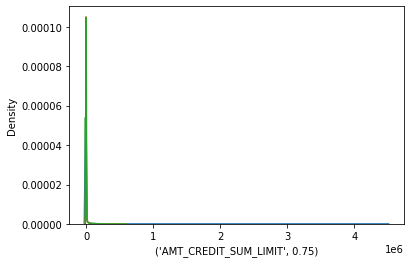

('AMT_CREDIT_SUM_LIMIT', 0.75) 98.35324453085013


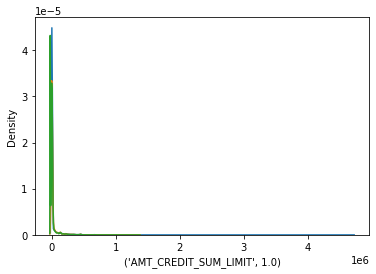

('AMT_CREDIT_SUM_LIMIT', 1.0)  95.82074179061283


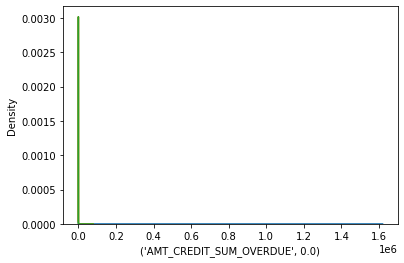

('AMT_CREDIT_SUM_OVERDUE', 0.0) 99.7966795823234


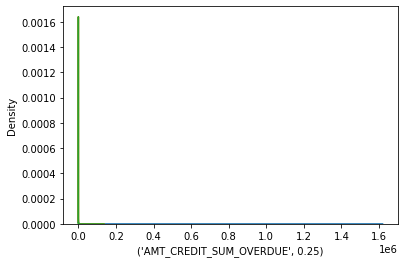

('AMT_CREDIT_SUM_OVERDUE', 0.25) 99.63859460967657


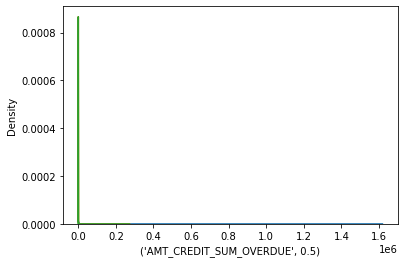

('AMT_CREDIT_SUM_OVERDUE', 0.5) 99.45303031542912


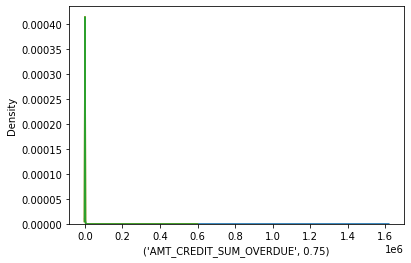

('AMT_CREDIT_SUM_OVERDUE', 0.75) 99.42605628101447


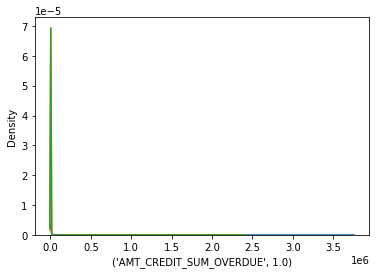

('AMT_CREDIT_SUM_OVERDUE', 1.0) 98.85836251951227


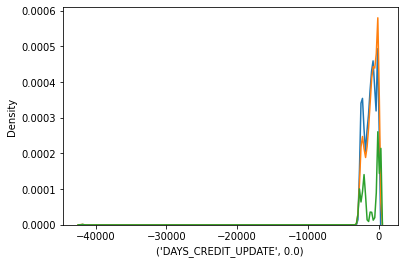

('DAYS_CREDIT_UPDATE', 0.0)    25.456510760205198


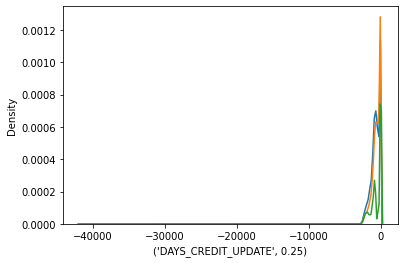

('DAYS_CREDIT_UPDATE', 0.25)   40.633866728295374


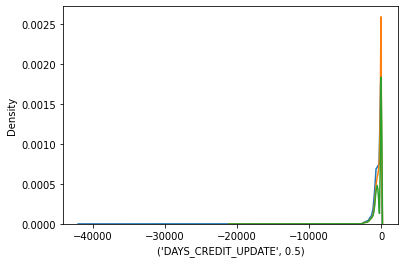

('DAYS_CREDIT_UPDATE', 0.5)    65.31526304503241


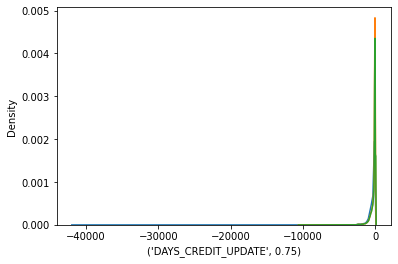

('DAYS_CREDIT_UPDATE', 0.75)   89.20519086601962


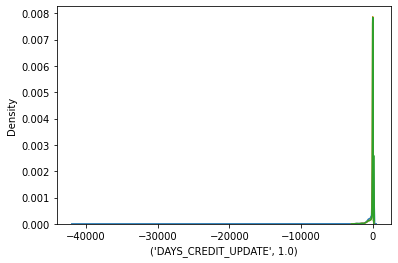

('DAYS_CREDIT_UPDATE', 1.0)    98.56318975824763


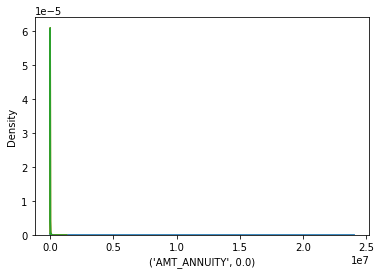

('AMT_ANNUITY', 0.0)           99.77073305587496


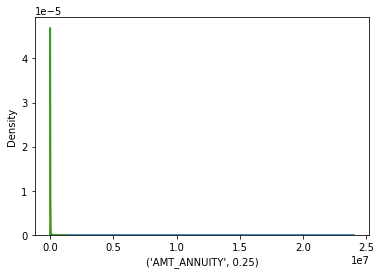

('AMT_ANNUITY', 0.25)          99.72735099417733


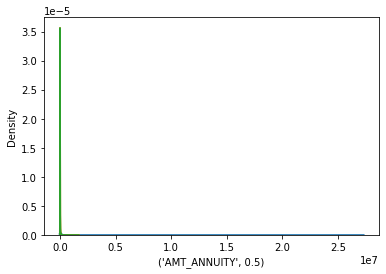

('AMT_ANNUITY', 0.5)           99.61213701666797


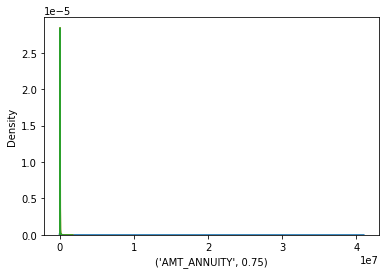

('AMT_ANNUITY', 0.75)          99.83292473402238


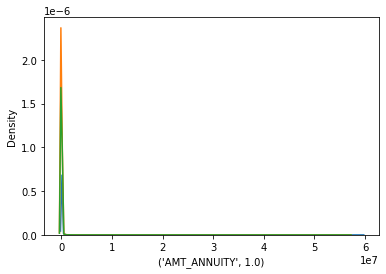

('AMT_ANNUITY', 1.0)           78.55917037004694


<Figure size 432x288 with 0 Axes>

In [235]:
for head in met_heads:
        
    x_1, y_1 = sns.kdeplot(payback[head]).get_lines()[0].get_data()
    x_2, y_2 = sns.kdeplot(default[head]).get_lines()[1].get_data()
    
    x = np.array(list(zip(x_1, x_2)))
    y = np.array(list(zip(y_1, y_2)))

    maxi = np.maximum(y[:,0],y[:,1])
    mini = np.minimum(y[:,0],y[:,1])
    diff = np.subtract(maxi,mini)
    
    plt.plot(x_2, diff)
    
    rate = (np.trapz(diff, x_1) / np.trapz(maxi, x_1) * 100 + np.trapz(diff, x_2) / np.trapz(maxi, x_2) * 100) / 2
    nan = bureau[head].isna().sum() / len(bureau[head]) * 100
    null = len(bureau[bureau[head] == 0]) / len(bureau[head]) * 100
    
    plt.show()
    plt.clf()
    
    print('{:30s} {:5}'.format(str(head), rate))